# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Ekaterina Shmakova*</center>

### Packages used in script

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import numpy.random as rnd
import networkx as nx
%matplotlib inline
import random

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

### Solution: 

Firstly, let's try to draw Barabasi model with special function in a package Networkx.

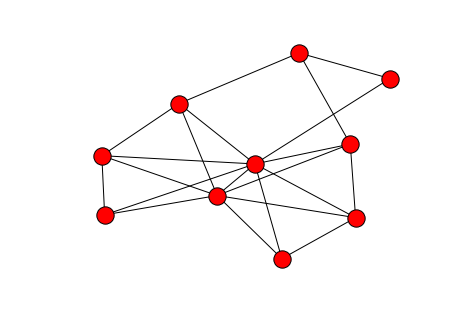

In [6]:
BA_graph = nx.barabasi_albert_graph(10, 3, seed=None)
nx.draw(BA_graph)

**1. Build Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

### Solution for Model A
So, we should look inside the function that we use previously. It can be done with script inside package
(https://networkx.github.io/documentation/latest/_modules/networkx/generators/random_graphs.html#barabasi_albert_graph) with little corrections. 

In [7]:
def barabasi_albert_graph_2(n, m, seed):
    if m < 1 or  m >=n:
        raise nx.NetworkXError("Barabási–Albert network must have m >= 1"
                               " and m < n, m = %d, n = %d" % (m, n))
        if seed is not None:
            random.seed(seed)
    # Add m initial nodes (m0 in barabasi-speak)
    G = nx.empty_graph(m)
    G.name = "barabasi_albert_graph(%s,%s)"%(n,m)
    # Target nodes for new edges
    targets = list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes = []
    # Start adding the other n-m nodes. The first node is m.
    source = m
    while source < n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source]*m,targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source]*m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachement)
        targets = random.sample(repeated_nodes,m)
        source += 1
    return G

Let's make sure we did right.

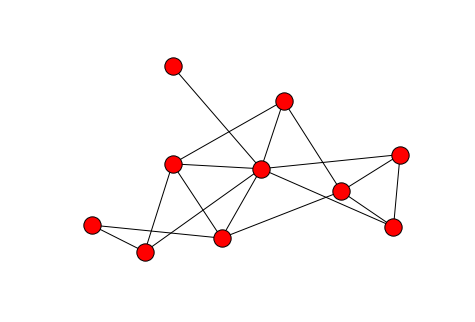

In [8]:
n = 10
m = 3
seed = None
BA2_graph = barabasi_albert_graph_2(n, m, seed)
nx.draw(BA2_graph)

Now we can make some corrections in order to build model A with lack of prefferential attachment

In [27]:
def model_A (n, m, seed):
    if m < 1 or  m >=n:
        raise nx.NetworkXError("Barabási–Albert network must have m >= 1"
                               " and m < n, m = %d, n = %d" % (m, n))
    if seed is not None:
        random.seed(seed)       
    G = nx.empty_graph(m)
    G.name = "Lack of prefferential attachment(%s,%s)"%(n,m)
    targets=list(range(m))
    nodes = targets
    source = m
    while source < n:
        G.add_edges_from(zip([source]*m,targets))
        nodes.extend([source])
        targets = random.sample(nodes, m)
        source += 1
    return G

In [ ]:
n = 10
m = 3
seed = None
model_A = model_A (n, m, seed)
nx.draw(model_A)

Look what we have

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

### Solution for Model B

Changing conditions for n and adding for. If we don't use that for, our graph'll have only nodes in circle. 

In [35]:
def model_B (n, m, seed):
    if m < 1 or  m >=n:
        raise nx.NetworkXError("Barabási–Albert network must have m >= 1"
                               " and m < n, m = %d, n = %d" % (m, n))
    if seed is not None:
        random.seed(seed)       
    G = nx.empty_graph(n)
    G.name = "Lack of growing(%s,%s)"%(n,m)
    nodes = list(range(n))
    for x in range(n):
        targets = [t for t in nodes if t !=x and t not in G.neighbors(x)]
        targets = random.sample(targets, m)
        G.add_edges_from(zip([x]*m, targets))
        nodes.extend([x]*m)
        nodes.extend(targets)
    return G    

Checking...

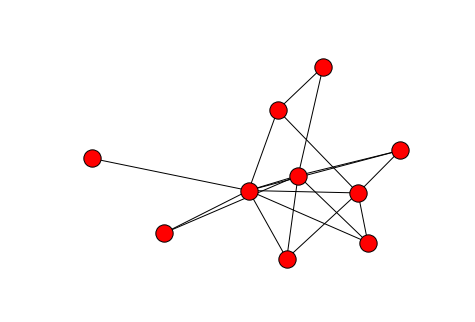

In [36]:
n = 10
m = 2
seed = None
model_B = model_B (n, m, seed)
nx.draw(model_B)

1. Generate networks according to the models above ($N > 1000$ nodes)

I don't plot them, because there is no way to understand, what is happening.

In [28]:
n = 1100
m = 3
seed = None
model_A = model_A (n, m, seed)

2.Compute CDF/PDF, describe the distribution and compute\describe its properties.

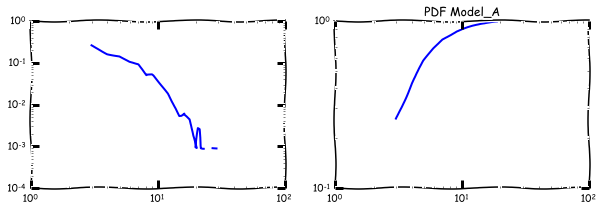

In [30]:
G = model_A
nd = list(G.degree().values())
bins = np.bincount(nd)
pdf = bins/n
cdf = np.cumsum(pdf)

plt.figure(figsize=(10,3))

plt.title('CDF Model_A')
plt.subplot(1,2,2)  
plt.loglog(cdf)

plt.title('PDF Model_A')
plt.subplot(1,2,1)
plt.loglog(pdf)

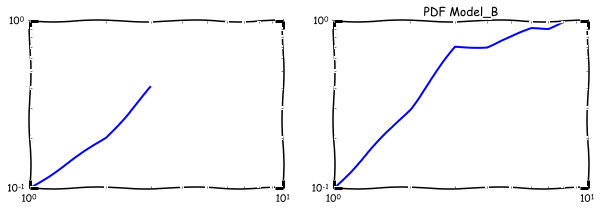

In [37]:
G = model_B
nd = list(G.degree().values())
bins = np.bincount(nd)
pdf = bins/n
cdf = np.cumsum(pdf)

plt.figure(figsize=(10,3))

plt.title('CDF Model_B')
plt.subplot(1,2,2)  
plt.loglog(cdf)

plt.title('PDF Model_B')
plt.subplot(1,2,1)
plt.loglog(pdf)

Illustate the following dependencies:
average path length to the number of nodes
average clustering coefficient to the number of nodes
average node degee to the nodes "age"
Is scale-free property conserved in these models?
Analyse results with respect to various parameter settings

In [102]:
import pylab as pl

G = model_A
average_path_length = nx.average_shortest_path_length(G)
average_node_degree = float(sum(degree_list))/n
average_clustering_coef = nx.average_clustering(G)

print ("Statistics for Model_A:")
print ("Avg. Node Degree: %f" % (average_node_degree))
print ("Avg. Length: %f" % (average_path_length))
print ("Avg. Clustering Coef: %f" % (average_clustering_coef))
print()

G = model_B
print ("Statistics for Model_B:")
print ("Avg. Node Degree: %f" % (average_node_degree))
print ("Avg. Length: %f" % (average_path_length))
print ("Avg. Clustering Coef: %f" % (average_clustering_coef))

Statistics for Model_A:
Avg. Node Degree: 0.030000
Avg. Length: 4.007096
Avg. Clustering Coef: 0.007785

Statistics for Model_B:
Avg. Node Degree: 0.030000
Avg. Length: 4.007096
Avg. Clustering Coef: 0.007785


### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$

In [99]:
def vertex_copying_model(n, q, directed):
    G = nx.erdos_renyi_graph(n, q)
    source = n
    while source < n:
        i = np.random.random(G.nodes())
        dict = {}
        for j in G.neighbors(i):
            dict[j] = np.random.random()
        copied = [k for k, v in dict.items() if v <= q]
        G.add_edges_from(zip([source]*len(copied), copied))
        rewired = [k for k, v in dict.items() if v > q]
        potential = [x for x in G.nodes() if x != source and x not in G.neighbors(i)]
        if len(potential) < len(rewired):
            r_fact = len(potential)
        else:
            r_fact = len(rewired)
        targets = random_subset(potential, r_fact)
        G.add_edges_from(zip([source]*r_fact, targets))
        source += 1  
    return G

Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

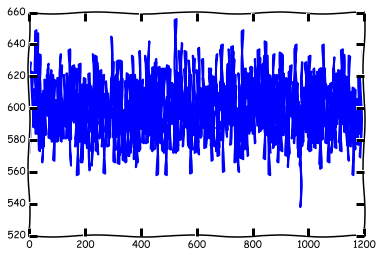

In [100]:
n = 1200
q = 0.5
p = 0.005
directed = False
vertex_copying_model = vertex_copying_model(n, q, directed)
plt.plot(list(G.degree().keys()), list(G.degree().values()))

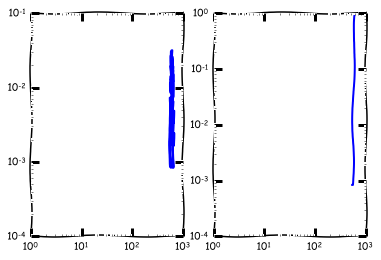

In [97]:
# directed = False
node = np.bincount(list(G.degree().values()))
pdf = node / n
cdf = np.cumsum(pdf)

plt.subplot(1,2,1)
plt.loglog(np.arange(0, len(pdf)), pdf)

plt.subplot(1,2,2)
plt.loglog(np.arange(0, len(cdf)), cdf)   

In [103]:
import pylab as pl

G = vertex_copying_model
average_path_length = nx.average_shortest_path_length(G)
average_node_degree = float(sum(nd))/n
average_clustering_coef = nx.average_clustering(G)

print ("Statistics for Model_A:")
print ("Avg. Node Degree: %f" % (average_node_degree))
print ("Avg. Length: %f" % (average_path_length))
print ("Avg. Clustering Coef: %f" % (average_clustering_coef))

Statistics for Model_A:
Avg. Node Degree: 0.030000
Avg. Length: 1.500952
Avg. Clustering Coef: 0.498952

